Learnings
- we know how to use youtube api with python
- use "order" in youtube.search().list to sort by upload date
- can get thumbnails too since we have thumbnail urls
- search accounts for scheduled livestreams

In [55]:
! pip3 install plotly

You should consider upgrading via the '/Users/denisebby/.pyenv/versions/3.10.3/envs/pl_dev_1/bin/python3.10 -m pip install --upgrade pip' command.


In [54]:
! pip3 install dash
! pip3 install dash_bootstrap_components 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 17.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 KB 6.6 MB/s eta 0:00:00
You should consider upgrading via the '/Users/denisebby/.pyenv/versions/3.10.3/envs/pl_dev_1/bin/python3.10 -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 KB 2.6 MB/s eta 0:00:000:00:01m eta 0:00:01
You should consider upgrading via the '/Users/denisebby/.pyenv/versions/3.10.3/envs/pl_dev_1/bin/python3.10 -m pip install --upgrade pip' command.


In [67]:
query = "mar thoma church english holy communion"
# filters: uploaded this week 
# show upcoming livestreams as well
# sort by upload date (most recent first)
# prefer English Holy Communion


In [ ]:
# ! pip3 install --upgrade google-api-python-client
# ! pip3 install --upgrade google-auth-oauthlib google-auth-httplib2


In [78]:
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())
API_KEY = os.environ.get("API_KEY")

In [3]:
import os

import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors

In [6]:
youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=API_KEY)

In [68]:
# request = youtube.channels().list(
#     part="snippet,contentDetails,statistics",
#     id="UC_x5XG1OV2P6uZZ5FSM9Ttw"
# )
# response = request.execute()

request = youtube.search().list(
        part="snippet",
        maxResults=25,
        order = "date",
        q=query
    )
response = request.execute()

In [44]:
# confirm this picks up future scheduled livestreams
query = "What it can mean to be an immigrant | Notes from America with Kai Wright"
request2 = youtube.search().list(
        part="snippet",
        maxResults=25,
        order = "date",
        q=query
    )
response2 = request2.execute()

In [70]:
print(len(response))
print(response.keys())
print(len(response["items"]))
print(response["items"][0].keys())

6
dict_keys(['kind', 'etag', 'nextPageToken', 'regionCode', 'pageInfo', 'items'])
25
dict_keys(['kind', 'etag', 'id', 'snippet'])


In [41]:
print(response["items"][0])
print(response["items"][24])

{'kind': 'youtube#searchResult', 'etag': 'ec4DKExnET1xD-RyO6X9zkr4K1o', 'id': {'kind': 'youtube#video', 'videoId': 'PF6FHoRanD0'}, 'snippet': {'publishedAt': '2023-02-12T18:50:40Z', 'channelId': 'UCVRHQjz4yZkaq-847rnH2xg', 'title': 'English Holy Communion Service - February 12, 2023', 'description': '"Don\'t worry about anything; instead pray about everything. Tell God what you need, and thank Him for all He has done.', 'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/PF6FHoRanD0/default.jpg', 'width': 120, 'height': 90}, 'medium': {'url': 'https://i.ytimg.com/vi/PF6FHoRanD0/mqdefault.jpg', 'width': 320, 'height': 180}, 'high': {'url': 'https://i.ytimg.com/vi/PF6FHoRanD0/hqdefault.jpg', 'width': 480, 'height': 360}}, 'channelTitle': 'The Canadian Mar Thoma Church', 'liveBroadcastContent': 'none', 'publishTime': '2023-02-12T18:50:40Z'}}
{'kind': 'youtube#searchResult', 'etag': '0nn6U9d5oKib0m54G-HjsdNfNP4', 'id': {'kind': 'youtube#video', 'videoId': 'l9ok2lGRaL4'}, 'snippet': {

In [64]:
print(response["items"][0]["snippet"]["publishedAt"])
print(response["items"][0]["snippet"]["publishTime"])
print(response["items"][0]["snippet"]["title"])
print(response["items"][0]["snippet"]["channelTitle"])
print(response["items"][0]["snippet"]["description"])
print(response["items"][0]["id"]["videoId"])


2023-02-12T18:50:40Z
2023-02-12T18:50:40Z
English Holy Communion Service - February 12, 2023
The Canadian Mar Thoma Church
"Don't worry about anything; instead pray about everything. Tell God what you need, and thank Him for all He has done.
PF6FHoRanD0


In [35]:
image_url = response["items"][0]["snippet"]["thumbnails"]["high"]["url"]

In [27]:
! pip3 install pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.0 MB/s eta 0:00:009.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/denisebby/.pyenv/versions/3.10.3/envs/pl_dev_1/bin/python3.10 -m pip install --upgrade pip' command.


In [65]:
from PIL import Image
import requests

im = Image.open(requests.get('https://i.ytimg.com/vi/xdxHsedPwIc/mqdefault.jpg', stream=True).raw)

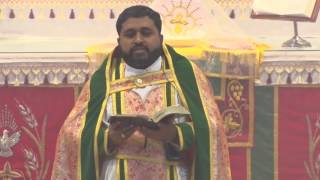

In [66]:
im

In [50]:
response["items"]

[{'kind': 'youtube#searchResult',
  'etag': 'ec4DKExnET1xD-RyO6X9zkr4K1o',
  'id': {'kind': 'youtube#video', 'videoId': 'PF6FHoRanD0'},
  'snippet': {'publishedAt': '2023-02-12T18:50:40Z',
   'channelId': 'UCVRHQjz4yZkaq-847rnH2xg',
   'title': 'English Holy Communion Service - February 12, 2023',
   'description': '"Don\'t worry about anything; instead pray about everything. Tell God what you need, and thank Him for all He has done.',
   'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/PF6FHoRanD0/default.jpg',
     'width': 120,
     'height': 90},
    'medium': {'url': 'https://i.ytimg.com/vi/PF6FHoRanD0/mqdefault.jpg',
     'width': 320,
     'height': 180},
    'high': {'url': 'https://i.ytimg.com/vi/PF6FHoRanD0/hqdefault.jpg',
     'width': 480,
     'height': 360}},
   'channelTitle': 'The Canadian Mar Thoma Church',
   'liveBroadcastContent': 'none',
   'publishTime': '2023-02-12T18:50:40Z'}},
 {'kind': 'youtube#searchResult',
  'etag': '69JdhnXFms7qG3qfpc_pxaU5mwA',
 

In [51]:
import pickle

In [71]:
with open('../data/recent_services.pickle', 'wb') as handle:
    pickle.dump(response, handle, protocol=pickle.HIGHEST_PROTOCOL)
handle.close()

In [61]:
import pandas as pd
data_df = pd.read_pickle(r"../data/recent_services.pickle")

In [62]:
data_df

{'kind': 'youtube#searchListResponse',
 'etag': '7qmEjggjMuK0gXUoNO7VL64xcdU',
 'nextPageToken': 'CBkQAA',
 'regionCode': 'US',
 'pageInfo': {'totalResults': 119334, 'resultsPerPage': 25},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'ec4DKExnET1xD-RyO6X9zkr4K1o',
   'id': {'kind': 'youtube#video', 'videoId': 'PF6FHoRanD0'},
   'snippet': {'publishedAt': '2023-02-12T18:50:40Z',
    'channelId': 'UCVRHQjz4yZkaq-847rnH2xg',
    'title': 'English Holy Communion Service - February 12, 2023',
    'description': '"Don\'t worry about anything; instead pray about everything. Tell God what you need, and thank Him for all He has done.',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/PF6FHoRanD0/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/PF6FHoRanD0/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/PF6FHoRanD0/hqdefault.jpg',
      'width': 480,
      'height': 